In [76]:
# Part g) Fine-Tuning

import os
import tarfile
import urllib
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import metrics

# gathering the dataset


PATH = "arp_mitm"

FILE = "ARP MitM_dataset-002.csv"
L_FILE = "ARP MitM_labels.csv"

csv_path = os.path.join(PATH, FILE)
dataset = pd.read_csv(csv_path, header=None)  

display(dataset.head())
display(dataset.info())
display(dataset.describe())

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,1.000000,1294.0,0.000000e+00,1.000000,1294.0,0.000000e+00,1.000000,1294.0,0.000000e+00,1.000000,...,0.000000e+00,0.0,0.0,1.000000,1294.0,0.000000,1294.0,0.000000e+00,0.0,0.0
1,1.000000,1514.0,0.000000e+00,1.000000,1514.0,0.000000e+00,1.000000,1514.0,0.000000e+00,1.000000,...,0.000000e+00,0.0,0.0,1.000000,1514.0,0.000000,1514.0,0.000000e+00,0.0,0.0
2,1.999505,1294.0,6.984919e-10,1.999703,1294.0,2.328306e-10,1.999901,1294.0,6.984919e-10,1.999990,...,0.000000e+00,0.0,0.0,1.999999,1294.0,0.000000,1294.0,0.000000e+00,0.0,0.0
3,2.998985,1294.0,9.313226e-10,2.999391,1294.0,4.656613e-10,2.999797,1294.0,6.984919e-10,2.999980,...,6.984919e-10,0.0,0.0,2.999998,1294.0,0.000015,1294.0,2.328306e-10,0.0,0.0
4,3.998061,1294.0,9.313226e-10,3.998836,1294.0,2.328306e-10,3.999612,1294.0,6.984919e-10,3.999961,...,2.328306e-10,0.0,0.0,3.999996,1294.0,0.000000,1294.0,0.000000e+00,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2504267 entries, 0 to 2504266
Columns: 115 entries, 0 to 114
dtypes: float64(115)
memory usage: 2.1 GB


None

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
count,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,...,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06
mean,3.161843e+02,1.263429e+03,1.629564e+05,5.206959e+02,1.263908e+03,1.624291e+05,1.542137e+03,1.264399e+03,1.618282e+05,1.508207e+04,...,1.618792e+05,-2.279080e-03,-7.277519e-07,2.433348e+04,1.264685e+03,3.848150e+02,1.319794e+03,1.617353e+05,-2.131455e-03,-5.309278e-07
std,1.261311e+02,2.731945e+02,4.387131e+04,2.018029e+02,2.730516e+02,4.250538e+04,5.917664e+02,2.729755e+02,4.140203e+04,5.965275e+03,...,4.570896e+04,1.849400e+00,6.071145e-04,6.679195e+03,2.771983e+02,1.050558e+02,7.498082e+01,4.563698e+04,1.538249e+00,5.666412e-04
min,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,...,0.000000e+00,-1.464452e+03,-4.688243e-01,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,0.000000e+00,-8.329919e+02,-2.887023e-01
25%,1.893583e+02,1.302018e+03,1.490105e+05,3.071747e+02,1.301232e+03,1.466209e+05,8.890711e+02,1.297967e+03,1.435192e+05,8.741032e+03,...,1.793071e+05,0.000000e+00,0.000000e+00,2.347740e+04,1.335240e+03,4.248047e+02,1.335240e+03,1.804590e+05,0.000000e+00,0.000000e+00
50%,3.604483e+02,1.328082e+03,1.727128e+05,6.178137e+02,1.331693e+03,1.754399e+05,1.921768e+03,1.336063e+03,1.789780e+05,1.945002e+04,...,1.809940e+05,0.000000e+00,0.000000e+00,2.763519e+04,1.340819e+03,4.254162e+02,1.340819e+03,1.809789e+05,0.000000e+00,0.000000e+00
75%,4.041041e+02,1.342751e+03,1.882200e+05,6.662270e+02,1.342305e+03,1.863478e+05,1.974742e+03,1.341165e+03,1.843493e+05,1.964070e+04,...,1.821485e+05,0.000000e+00,0.000000e+00,2.802381e+04,1.341263e+03,4.259399e+02,1.341263e+03,1.814248e+05,0.000000e+00,0.000000e+00
max,5.365877e+02,1.514000e+03,4.942291e+05,8.073135e+02,1.514000e+03,4.948259e+05,2.124893e+03,1.514000e+03,4.953075e+05,1.983936e+04,...,4.257562e+05,7.038125e+01,8.482200e-02,3.091260e+04,1.514000e+03,6.525000e+02,1.514000e+03,4.257562e+05,3.335587e+02,1.560442e-01


In [77]:
# gathering classified output data for dataset

L_csv_path = os.path.join(PATH, L_FILE)
dataset_L = pd.read_csv(L_csv_path, dtype={"": int, "x": 'float64'})  

display(dataset_L.head())
display(dataset_L.info())
display(dataset_L.describe())

,Unnamed: 0,x
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2504267 entries, 0 to 2504266
Data columns (total 2 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   x           float64
dtypes: float64(1), int64(1)
memory usage: 38.2 MB


None

,Unnamed: 0,x
count,2.504267e+06,2.504267e+06
mean,1.252134e+06,4.573282e-01
std,7.229198e+05,4.981759e-01
min,1.000000e+00,0.000000e+00
25%,6.260675e+05,0.000000e+00
50%,1.252134e+06,0.000000e+00
75%,1.878200e+06,1.000000e+00
max,2.504267e+06,1.000000e+00


In [78]:
# EXTRA TREES CLASSIFIER FEATURE SELECTION
# gathering testing and training data

feature_list_etc=[12, 13, 27, 28, 58, 63, 77, 78, 108, 109]
x1_train, x1_test, y1_train, y1_test = train_test_split(dataset.iloc[:,feature_list_etc], dataset_L.drop('Unnamed: 0', axis=1), random_state=2)

In [79]:
# part g) fine tuning

# EXTRA TREES CLASSIFIER FEATURE SELECTION
# running logistic regression and training the model using fit with the training data

# MODIFIED "C" OR INVERSE REGULARIZATION STRENGTH

logreg1 = LogisticRegression(multi_class='ovr', solver='lbfgs', n_jobs=11, C=10.0)
logreg1.fit(x1_train, y1_train.values.ravel())

LogisticRegression(C=10.0, multi_class='ovr', n_jobs=11)

In [80]:
# EXTRA TREES CLASSIFIER FEATURE SELECTION
# predicting the training and test data

y1_tr_pred = logreg1.predict(x1_train)
y1_pred = logreg1.predict(x1_test)

In [81]:
# EXTRA TREES CLASSIFIER FEATURE SELECTION
# finding the classification reports and accuracy scores for the training and testing datasets

print("\nTRAINING DATA:")
print(classification_report(y1_train, y1_tr_pred, target_names=['not malicous', 'malicous']))
print(metrics.accuracy_score(y1_train, y1_tr_pred))

print("\nTEST DATA:")
print(classification_report(y1_test, y1_pred, target_names=['not malicous', 'malicous']))
print(metrics.accuracy_score(y1_test, y1_pred))


TRAINING DATA:
              precision    recall  f1-score   support

not malicous       0.97      0.93      0.95   1019393
    malicous       0.92      0.96      0.94    858807

    accuracy                           0.94   1878200
   macro avg       0.94      0.95      0.94   1878200
weighted avg       0.95      0.94      0.94   1878200

0.9447838355872644

TEST DATA:
              precision    recall  f1-score   support

not malicous       0.97      0.93      0.95    339602
    malicous       0.92      0.96      0.94    286465

    accuracy                           0.94    626067
   macro avg       0.94      0.95      0.94    626067
weighted avg       0.95      0.94      0.94    626067

0.9448717150081382


In [82]:
# EXTRA TREES CLASSIFIER FEATURE SELECTION
# confusion matrices for training and testing set

print("Number of 0's and 1's in y_train dataset:")
print(y1_train['x'].value_counts())
print("\nCONFUSION MATRIX FOR TRAINING SET: \n {}".format(confusion_matrix(y1_train, y1_tr_pred)))

print("\nNumber of 0's and 1's in y_test dataset:")
print(y1_test['x'].value_counts())
print("\nCONFUSION MATRIX FOR TESTING SET: \n {}".format(confusion_matrix(y1_test, y1_pred)))

Number of 0's and 1's in y_train dataset:
0.0    1019393
1.0     858807
Name: x, dtype: int64

CONFUSION MATRIX FOR TRAINING SET: 
 [[949744  69649]
 [ 34058 824749]]

Number of 0's and 1's in y_test dataset:
0.0    339602
1.0    286465
Name: x, dtype: int64

CONFUSION MATRIX FOR TESTING SET: 
 [[316332  23270]
 [ 11244 275221]]


In [83]:
# SELECT K BEST FEATURE SELECTION
# gathering testing and training data

feature_list_skb=[12, 13, 27, 28, 63, 56, 77, 88, 108, 101]
x2_train, x2_test, y2_train, y2_test = train_test_split(dataset.iloc[:,feature_list_skb], dataset_L.drop('Unnamed: 0', axis=1), random_state=2, stratify=dataset_L.drop('Unnamed: 0', axis=1), test_size=0.5)

In [84]:
# part g) fine tuning

# SELECT K BEST FEATURE SELECTION
# running logistic regression and training the model using fit with the training data

# MODIFIED "C" OR INVERSE REGULARIZATION STRENGTH

logreg2 = LogisticRegression(multi_class='ovr', solver='lbfgs', n_jobs=11, C=10000000.0)

logreg2.fit(x2_train, y2_train.values.ravel())

LogisticRegression(C=10000000.0, multi_class='ovr', n_jobs=11)

In [85]:
# SELECT K BEST FEATURE SELECTION
# predicting the training and test data

y2_tr_pred = logreg2.predict(x2_train)
y2_pred = logreg2.predict(x2_test)

In [97]:
# part h) training mse and test mse

from sklearn.metrics import mean_squared_error as mse

# SELECT K BEST FEATURE SELECTION
# finding training and testing mse for the predictions found in the previous lines of code

print("Training MSE = ", mse(y2_tr_pred,y2_train))
print("Testing MSE = ", mse(y2_pred,y2_test))

Training MSE =  0.009442287680302332
Testing MSE =  0.009296129647465847


In [86]:
# part h) accuracy scores

# SELECT K BEST FEATURE SELECTION
# finding the classification reports and accuracy scores for the training and testing datasets

print("\nTRAINING DATA:")
print(classification_report(y2_train, y2_tr_pred, target_names=['not malicous', 'malicous']))
print(metrics.accuracy_score(y2_train, y2_tr_pred))

print("\nTEST DATA:")
print(classification_report(y2_test, y2_pred, target_names=['not malicous', 'malicous']))
print(metrics.accuracy_score(y2_test, y2_pred))


TRAINING DATA:
              precision    recall  f1-score   support

not malicous       0.99      0.99      0.99    679497
    malicous       0.99      0.99      0.99    572636

    accuracy                           0.99   1252133
   macro avg       0.99      0.99      0.99   1252133
weighted avg       0.99      0.99      0.99   1252133

0.9905577123196977

TEST DATA:
              precision    recall  f1-score   support

not malicous       0.99      0.99      0.99    679498
    malicous       0.99      0.99      0.99    572636

    accuracy                           0.99   1252134
   macro avg       0.99      0.99      0.99   1252134
weighted avg       0.99      0.99      0.99   1252134

0.9907038703525342


In [88]:
# part h) Confusion Matrices

# SELECT K BEST FEATURE SELECTION
# confusion matrices for training and testing set

print("Number of 0's and 1's in y_train dataset:")
print(y2_train['x'].value_counts())
print("\nCONFUSION MATRIX FOR TRAINING SET: \n {}".format(confusion_matrix(y2_train, y2_tr_pred)))

print("\nNumber of 0's and 1's in y_test dataset:")
print(y2_test['x'].value_counts())
print("\nCONFUSION MATRIX FOR TESTING SET: \n {}".format(confusion_matrix(y2_test, y2_pred)))

Number of 0's and 1's in y_train dataset:
0.0    679497
1.0    572636
Name: x, dtype: int64

CONFUSION MATRIX FOR TRAINING SET: 
 [[672012   7485]
 [  4338 568298]]

Number of 0's and 1's in y_test dataset:
0.0    679498
1.0    572636
Name: x, dtype: int64

CONFUSION MATRIX FOR TESTING SET: 
 [[672050   7448]
 [  4192 568444]]


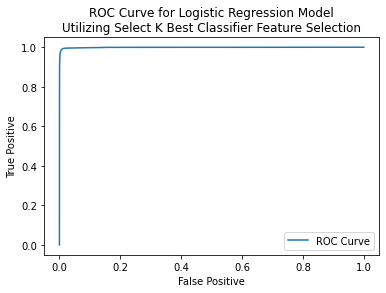

In [99]:
# Part h) ROC curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

logreg2_roc = logreg2.predict_proba(x2_test)

false_pos, true_pos, throwaway= roc_curve(y2_test, logreg2_roc[:, 1])

plt.plot(false_pos, true_pos, label='ROC Curve')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title("ROC Curve for Logistic Regression Model\nUtilizing Select K Best Classifier Feature Selection")
plt.legend()
plt.show()